# Evaluating Classification Models

In this notebook we will use a dataset of credit card transactions from Vesta

### Case Study: Credit Card Fraud

Our goal is to predict `isFraud`, where 1 indicates a fradulent transaction. We will use **K-Nearest Neighbors** for classification.

In [1]:
import pandas as pd

df_fraud = pd.read_csv(
    "https://datasci112.stanford.edu/data/fraud.csv")
df_fraud

,card4,card6,P_emaildomain,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
0,visa,debit,gmail.com,62.950,139.0,110.0,0.0,0.0,135.0,93.0,0.0,0.0,93.0,0.0,93.0,0.0,637.0,114.0,0
1,visa,debit,,35.950,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0
2,visa,debit,yahoo.com,117.000,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,1
3,visa,debit,hotmail.com,54.500,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,visa,debit,gmail.com,255.000,1.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,3.0,1.0,20.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,mastercard,debit,gmail.com,20.522,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0
59050,mastercard,credit,yahoo.com,50.000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0
59051,mastercard,debit,icloud.com,97.950,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,15.0,2.0,0
59052,visa,debit,gmail.com,16.723,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# We need to encode categorical variables using OneHotEncoder, then scale them.
pipeline = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(handle_unknown="ignore", sparse_output=False),
        ["card4", "card6", "P_emaildomain"]),
        remainder="passthrough"
    ),
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

In [8]:
X_train = df_fraud.drop("isFraud", axis="columns")
y_train = df_fraud["isFraud"]

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    pipeline,
    X=X_train, y=y_train,
    scoring="accuracy",
    cv=10
).mean()

np.float64(0.9681816479631644)

**`cv=10`** is **the most commonly used value** (The standart in the literatur).

- 10-fold cross-validation reduces overfitting while keeping the computational cost reasonable.

In [10]:
y_train.value_counts()

isFraud
0    56935
1     2119
Name: count, dtype: int64

The vast majority of transactions are normal!

If we just predicted that every transaction is normal, the accuracy would be $1 - \frac{2119}{59054} = 0.964$

Even though such predictions would be accurate overall, it is inaccurate for fraudulent transactions, A good model is **accurate for every class**

### Precision and Recall

As we see accuracy is not the best scoring metric every time. We need a score that measures "accuracy for class c".

**Precision:** Among the observations that were predicted to be in class c, what proportion acutally were?

P(correct|predicted class c)

**Recall:** Among the observations that were actually in class C, what proportion were predicted to be?

P(correct|actual class c)

! Each class has its own precision and recall

![geometric](https://i.imgur.com/oaZlHAS.png)

### Calculating Precision and Recall by Hand

To summarize results by the confusion matrix we can use `confusion_matrix` from `sklearn.metrics`

The output of the confusion matrix:


| TN | FP |
|----|----|
| FN | TP |


In [11]:
from sklearn.metrics import confusion_matrix
pipeline.fit(X_train, y_train)
y_train_ = pipeline.predict(X_train)
confusion_matrix(y_train, y_train_)

array([[56815,   120],
       [ 1522,   597]])

The **training accuracy** is calculated as:

Accuracy = (TP + TN) / Total samples

So in this example:
- TN $= 56817$
- TP $= 595$
- Total Samples $= 56817 + 1524 + 118 + 595 = 59054$
- **Accuracy** $= \frac{56817 + 595}{59054} = 0.972 = 97.2 \% $

**Precision** is calculated as:
Precision = TP / (TP + FP)

So in this example **for normal transactions**:
- TN $= 56817$
- FN $= 1524$
- Precision $= \frac{56817}{56817 + 1524} = 0.973877 = 97.4\%$

**For fraudulent transactions:**
- TP $= 597$
- FP $= 120$
- Precision $= \frac{597}{597 + 120} = 0.83263 = 83.2\%$


**Recall** is calculated as:
Recall = TP / (TP + FN)

So in this example **for normal transactions**:
- TN $= 56817$
- FP $= 118$
- Recall $= \frac{56817}{56817 + 118} = 0.9979 = 99.8\%$

**For fraudulent transactions:**
- TP $= 595$
- FN $=1524$
- Recall $= \frac{595}{595 + 1524} = 0.281 = 28.1\%$

In general, if the model classifies more observation as C, recal for class c **increases**, precision for class c **decreases**

**F1 Score:** Combines precision and recall into a single score. It is harmonic mean of precision and recall.

**F1 Score** calculated as:

$$ \frac{1}{\frac{1}{2}(\frac{1}{P} + \frac{1}{R})}$$

Where:
- P: precision
- R: Recall

So the F1 score of the classifier for fradulent transaction is:

$$ \frac{1}{\frac{1}{2}(\frac{1}{0.835} + \frac{1}{0.28})} = 42.0\%$$


! To achieve a **high F1 score**, both precision and recall have to be high. If either is low, then the harmonic mean will be low.

Remember that each class has its on precision, recall, and F1 but Scikit-Learn requires that the `scoring=` parameter be a single number.

For this, we can use:
- "precision_macro"
- "recall_macro"
- "f1_macro"

Which average the score over the classes.

In [12]:
cross_val_score(
    pipeline,
    X=X_train, y=y_train,
    scoring="f1_macro",
    cv=10
).mean()

np.float64(0.647618677299677)

### Precision-Recall Curve

Another way to illustrate the tradeoff between precision and recall is to graph the **precision-recall curve**



In [13]:
y_train_probs_ = pipeline.predict_proba(X_train)
y_train_probs_

array([[1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ]], shape=(59054, 2))

By default, Scikit-Learn classifies a transaction as fraud if the probablity is > 0.5.

We can change the treshold $t$ and use something other than 0.5. Depending on which $t$ we pick, we'll get a different precision and recall.

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_train, y_train_probs_[:, 1], pos_label=1)
precision

array([0.03588241, 0.33253244, 0.63603386, 0.83263598, 0.9278607 ,
       1.        , 1.        ])

F1 score performance across thresholds

/var/folders/xs/ht9rdgp11hs1bn_z_rxntkhw0000gn/T/ipykernel_44779/4046022738.py:7: RuntimeWarning: divide by zero encountered in divide
  "f1": 1 / (0.5 * (1 / precision + 1 / recall))


<Axes: xlabel='t', ylabel='f1'>

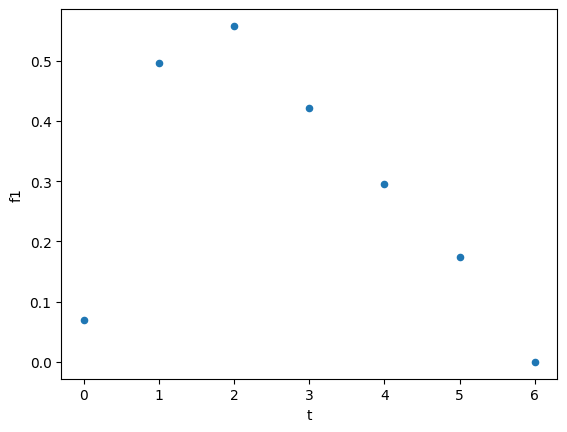

In [16]:
import numpy as np

pd.DataFrame({
    "t": np.arange(len(precision)),
    "precision": precision,
    "recall": recall,
    "f1": 1 / (0.5 * (1 / precision + 1 / recall))
}).plot.scatter(x="t", y="f1")

precision-recall trade-off that exists for any classifier

/var/folders/xs/ht9rdgp11hs1bn_z_rxntkhw0000gn/T/ipykernel_44779/620669146.py:5: RuntimeWarning: divide by zero encountered in divide
  "f1": 1 / (0.5 * (1 / precision + 1 / recall))


<Axes: xlabel='precision', ylabel='recall'>

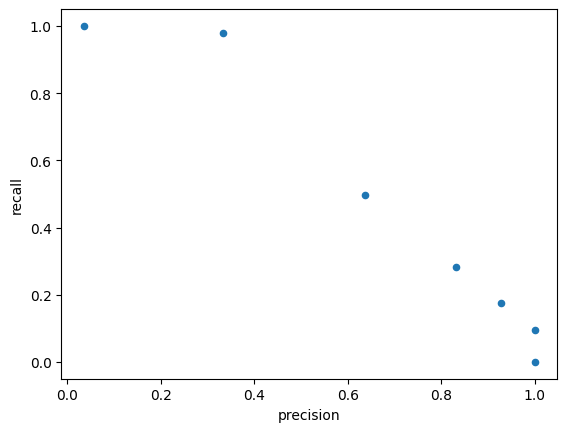

In [17]:
pd.DataFrame({
    "t": np.arange(len(precision)),
    "precision": precision,
    "recall": recall,
    "f1": 1 / (0.5 * (1 / precision + 1 / recall))
}).plot.scatter(x="precision", y="recall")